# Pre-Processing

Sunlab Faro Production data and Temperature of the photovoltaic modules from year 2017.

We provide data from two models of different manufactures (A and B).

The modules are located in Faro and each model has three different orientations: vertical, optimal and horizontal.
The granularity of the data is one minute and the timezone is UTC (Coordinated Universal Time). All files have daylight saving time correction.

<br>

Competition is to predict the variable 'B_Optimal - Power DC [W]' for the first seven days of 2018.

<br>
### 0 - Module Imports

In [311]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

<br>
### 1 - Reading in Data

In [213]:
def sunlab_csv_2_df(filename):
    return pd.read_csv(f'data/{filename}.csv', sep=';', index_col='Datetime', parse_dates=True).sort_index()

df_2014_gen = sunlab_csv_2_df('sunlab-faro-pv-2014')
df_2015_gen = sunlab_csv_2_df('sunlab-faro-pv-2015')
df_2016_gen = sunlab_csv_2_df('sunlab-faro-pv-2016')
df_2017_gen = sunlab_csv_2_df('sunlab-faro-pv-2017')

df_2014_weather = sunlab_csv_2_df('sunlab-faro-meteo-2014')
df_2015_weather = sunlab_csv_2_df('sunlab-faro-meteo-2015')
df_2016_weather = sunlab_csv_2_df('sunlab-faro-meteo-2016')
df_2017_weather = sunlab_csv_2_df('sunlab-faro-meteo-2017')
df_2018_weather = sunlab_csv_2_df('sunlab-faro-meteo-2018')

<br>
### 2 - Exploratory Data Analysis

In [218]:
df_2014_weather.shape

(524863, 8)

In [219]:
df_2014_gen.shape

(262145, 24)

In [217]:
df_2014_weather

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Precipitation [mm],Atmospheric pressure [hPa]
Datetime,,,,,,,,
2014-01-01 00:00:00,15.300000,1.406050,1.649239,0.508442,2.300000,232.00156,NaN,NaN
2014-01-01 00:01:00,15.300000,1.365813,1.645474,0.507736,2.416667,227.50672,NaN,NaN
2014-01-01 00:02:00,15.283334,1.406155,1.649413,0.508740,2.500000,219.86790,NaN,NaN
2014-01-01 00:03:00,15.300000,1.293696,1.645420,0.508438,2.850000,222.98490,NaN,NaN
2014-01-01 00:04:00,15.300000,1.474050,1.645991,0.508635,2.500000,228.94006,NaN,NaN
2014-01-01 00:05:00,15.266666,1.420801,1.663457,0.508639,2.416667,230.27646,NaN,NaN
2014-01-01 00:06:00,15.233334,1.495646,1.657046,0.508341,2.983333,229.00026,NaN,NaN
2014-01-01 00:07:00,15.216666,1.460922,1.656420,0.508236,3.083333,240.16468,NaN,NaN
2014-01-01 00:08:00,15.216666,1.407841,1.662886,0.508043,2.216667,230.81880,NaN,NaN


In [207]:
df_2014_gen

,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],A_Vertical - Temperature [ºC],...,B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ºC],B_Optimal - Temperature [ºC],B_Horizontal - Temperature [ºC],month,day,hour,minute,dec_time
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 07:41:00,NaN,NaN,NaN,14.60,0.19527,2.850946,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,41,7.683333
2014-01-01 07:42:00,NaN,NaN,NaN,23.10,0.07250,1.674750,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,42,7.700000
2014-01-01 07:43:00,19.00,0.0475,0.902500,23.10,0.07500,1.732500,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,43,7.716667
2014-01-01 07:44:00,18.65,0.0500,0.932500,23.10,0.07750,1.790250,NaN,NaN,NaN,9.0,...,NaN,NaN,10.3,9.7,8.8,1,1,7,44,7.733333
2014-01-01 07:45:00,18.65,0.0550,1.025750,22.20,0.08250,1.831500,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.7,8.9,1,1,7,45,7.750000
2014-01-01 07:46:00,14.80,0.0600,0.888000,23.00,0.08500,1.955000,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.8,8.9,1,1,7,46,7.766667
2014-01-01 07:47:00,30.40,0.0075,0.228000,23.00,0.08750,2.012500,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.8,8.9,1,1,7,47,7.783333
2014-01-01 07:48:00,30.50,0.0050,0.152500,23.10,0.09250,2.136750,NaN,NaN,NaN,9.2,...,NaN,NaN,10.4,9.8,8.8,1,1,7,48,7.800000
2014-01-01 07:49:00,19.05,0.0700,1.333500,23.10,0.09750,2.252250,15.60,0.0550,0.858000,9.2,...,0.0575,1.124125,10.4,9.8,8.8,1,1,7,49,7.816667


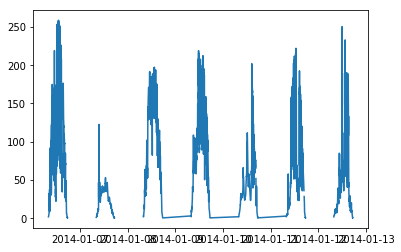

In [254]:
## Week of power
week_power_array = df_2014_gen[df_2014_gen.index.week==2]['A_Optimal - Power DC [W]']
plt.plot(week_power_array)

(0, 5)

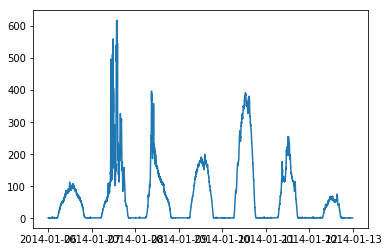

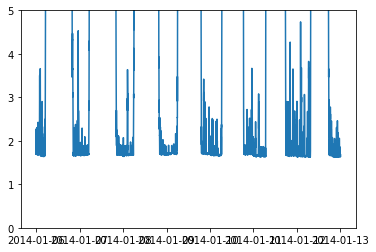

In [341]:
## Week of weather
week_power_array = df_2014_weather[df_2014_weather.index.week==2]['Diffuse Radiation [W/m2]']

plt.figure()
plt.plot(week_power_array)

plt.figure()
plt.plot(week_power_array)
plt.ylim(0,5)

(0, 370.01567754463264)

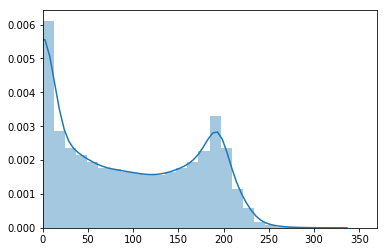

In [161]:
## Power output distribution
vals_list = list(df_2014_gen.dropna()['A_Optimal - Power DC [W]'])
neg_vals_list = [-x for x in vals_list]

plt.figure()
sns.distplot(vals_list+neg_vals_list)
plt.xlim(0)

In [257]:
## Extracting individual components from datetime
df_2014_gen['month'] = pd.to_datetime(df_2014_gen.reset_index().Datetime).dt.month.values
df_2014_gen['day'] = pd.to_datetime(df_2014_gen.reset_index().Datetime).dt.day.values
df_2014_gen['hour'] = pd.to_datetime(df_2014_gen.reset_index().Datetime).dt.hour.values
df_2014_gen['minute'] = pd.to_datetime(df_2014_gen.reset_index().Datetime).dt.minute.values
df_2014_gen['dec_time'] = df_2014_gen['hour'] + df_2014_gen['minute']/60

df_2014_gen

,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],A_Vertical - Temperature [ºC],...,B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ºC],B_Optimal - Temperature [ºC],B_Horizontal - Temperature [ºC],month,day,hour,minute,dec_time
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 07:41:00,NaN,NaN,NaN,14.60,0.19527,2.850946,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,41,7.683333
2014-01-01 07:42:00,NaN,NaN,NaN,23.10,0.07250,1.674750,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,42,7.700000
2014-01-01 07:43:00,19.00,0.0475,0.902500,23.10,0.07500,1.732500,NaN,NaN,NaN,9.0,...,NaN,NaN,10.2,9.7,8.8,1,1,7,43,7.716667
2014-01-01 07:44:00,18.65,0.0500,0.932500,23.10,0.07750,1.790250,NaN,NaN,NaN,9.0,...,NaN,NaN,10.3,9.7,8.8,1,1,7,44,7.733333
2014-01-01 07:45:00,18.65,0.0550,1.025750,22.20,0.08250,1.831500,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.7,8.9,1,1,7,45,7.750000
2014-01-01 07:46:00,14.80,0.0600,0.888000,23.00,0.08500,1.955000,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.8,8.9,1,1,7,46,7.766667
2014-01-01 07:47:00,30.40,0.0075,0.228000,23.00,0.08750,2.012500,NaN,NaN,NaN,9.1,...,NaN,NaN,10.3,9.8,8.9,1,1,7,47,7.783333
2014-01-01 07:48:00,30.50,0.0050,0.152500,23.10,0.09250,2.136750,NaN,NaN,NaN,9.2,...,NaN,NaN,10.4,9.8,8.8,1,1,7,48,7.800000
2014-01-01 07:49:00,19.05,0.0700,1.333500,23.10,0.09750,2.252250,15.60,0.0550,0.858000,9.2,...,0.0575,1.124125,10.4,9.8,8.8,1,1,7,49,7.816667


<Figure size 432x288 with 0 Axes>

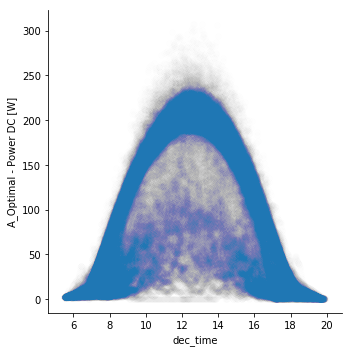

In [260]:
## Density plot of power output with time
plt.figure()
sns.lmplot(x='dec_time', y='A_Optimal - Power DC [W]', data=df_2014_gen.dropna(), fit_reg=False, scatter_kws={'alpha':0.005})

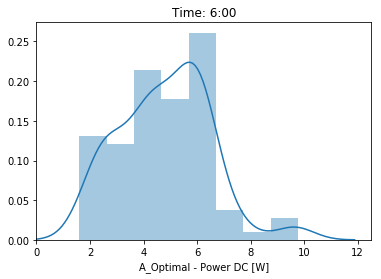

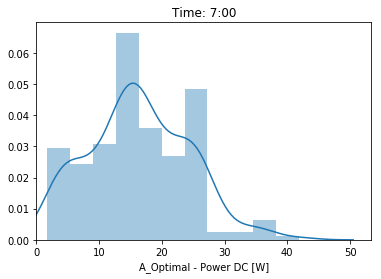

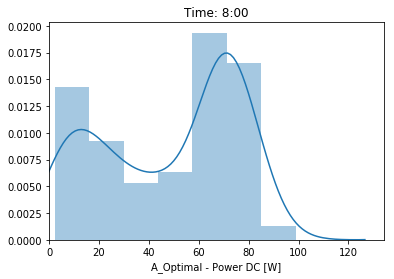

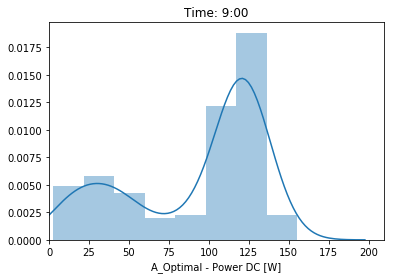

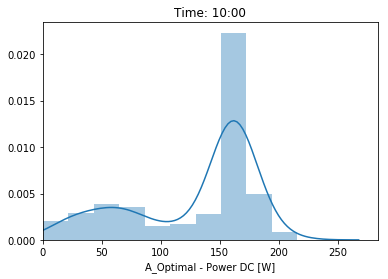

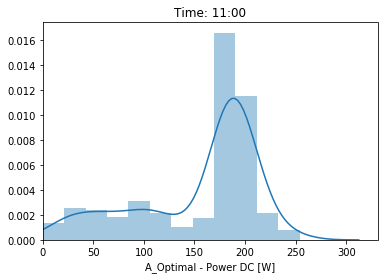

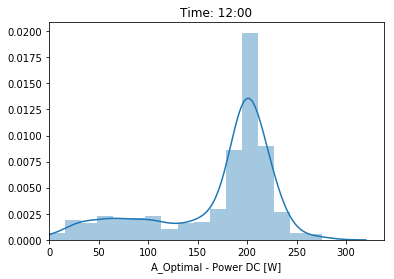

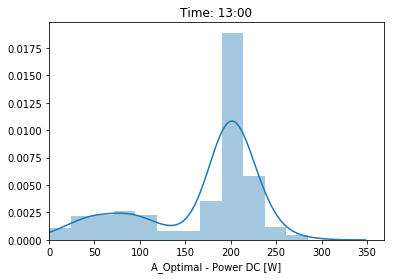

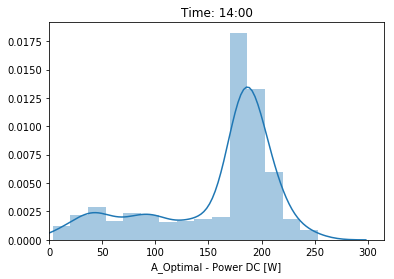

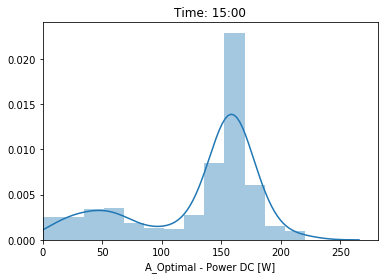

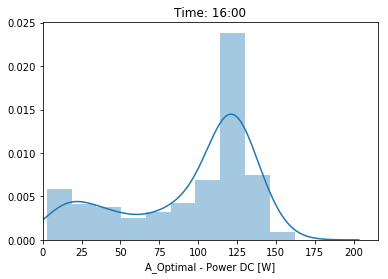

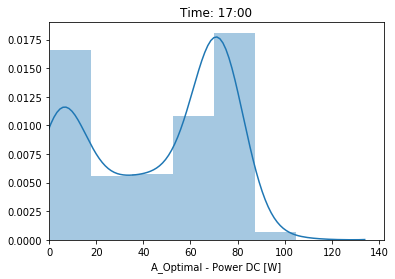

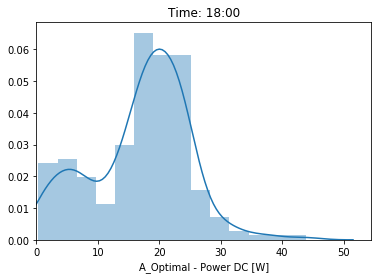

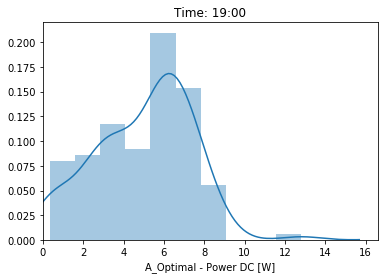

In [205]:
## Looking at single slices of the day

for idx_hour in range(6, 20):
    plt.figure()
    sns.distplot(df_2014_gen[df_2014_gen.dec_time==idx_hour].dropna()['A_Optimal - Power DC [W]'])
    plt.title(f'Time: {idx_hour}:00')
    plt.xlim(0)

In [76]:
def check_idx_adj_time(df):
    # Check to ensure datetime is always +00:00
    # Must be run on datetime string as given in sun lab csv
    idx_vals = df.index.values
    adj_time_list = [x[-5:-3] for x in idx_vals]

    for i in range(len(adj_time_list)):
        if adj_time_list[i] != '00':
            print('')
            print(i)
            print(adj_time_list[i])
            
check_idx_adj_time(df_2014_gen)

<br>
### 3 - Handling NaN & Missing Values
#### 3.1 - Generation Dataset

Two types of missing value in this dataset, during the night when there is no generation and also recording errors.

Missing values due to recording errors can be filled in using averages of the values before and after, entries during the night will be filled in with 0.

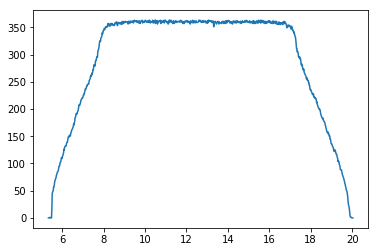

In [261]:
## Visualising number of measurements in time
dec_time_count = df_2014_gen.groupby('dec_time').count().loc[:, 'A_Vertical - Power DC [W]']
plt.plot(dec_time_count.index, dec_time_count)

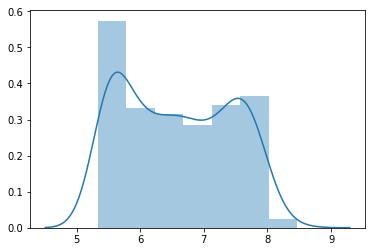

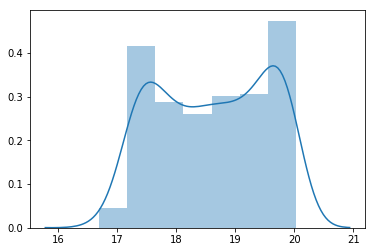

In [262]:
## Visualising start and end times for power output
dec_time_vals = df_2014_gen.dec_time.values
dec_time_starts = []
dec_time_ends = []

for i in range(0, len(dec_time_vals)-1):
    if dec_time_vals[i+1]<dec_time_vals[i]:
        dec_time_starts.append(dec_time_vals[i+1])
        dec_time_ends.append(dec_time_vals[i])
        
plt.figure()
sns.distplot(dec_time_starts)
        
plt.figure()
sns.distplot(dec_time_ends)

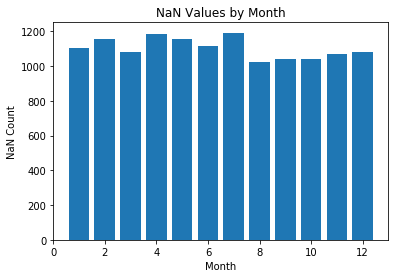

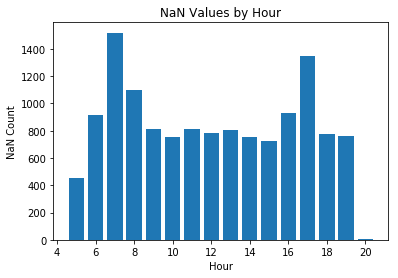

In [344]:
def visualise_NaN_in_time(df):
    df_null = df[df.isnull().any(axis=1)]

    plt.figure()
    month_groupby = df_null.groupby('month').count().day
    plt.bar(month_groupby.index, month_groupby.values)
    plt.title('NaN Values by Month')
    plt.xlabel('Month')
    plt.ylabel('NaN Count')

    plt.figure()
    hour_groupby = df_null.groupby('hour').count().day
    plt.bar(hour_groupby.index, hour_groupby.values)
    plt.title('NaN Values by Hour')
    plt.xlabel('Hour')
    plt.ylabel('NaN Count')
    
visualise_NaN_in_time(df_2014_gen)

In [89]:
def calc_df_pct_na(df):
    print('Percentage Missing:')
    print('')
    print(100*round(df.isnull().sum()/df.count(), 4))
    
calc_df_pct_na(df_2014_gen)

Percentage Missing:

A_Vertical - Voltage DC [V]        2.07
A_Vertical - Current DC [A]        2.07
A_Vertical - Power DC [W]          2.07
A_Optimal - Voltage DC [V]         0.70
A_Optimal - Current DC [A]         0.70
A_Optimal - Power DC [W]           0.70
A_Horizontal - Voltage DC [V]      0.92
A_Horizontal - Current DC [A]      0.92
A_Horizontal - Power DC [W]        0.92
A_Vertical - Temperature [ºC]      0.00
A_Optimal - Temperature [ºC]       0.00
A_Horizontal - Temperature [ºC]    0.00
B_Vertical - Voltage DC [V]        1.58
B_Vertical - Current DC [A]        1.58
B_Vertical - Power DC [W]          1.58
B_Optimal - Voltage DC [V]         0.96
B_Optimal - Current DC [A]         0.96
B_Optimal - Power DC [W]           0.96
B_Horizontal - Voltage DC [V]      1.66
B_Horizontal - Current DC [A]      1.66
B_Horizontal - Power DC [W]        1.66
B_Vertical - Temperature [ºC]      0.00
B_Optimal - Temperature [ºC]       0.00
B_Horizontal - Temperature [ºC]    0.00
dtype: float64


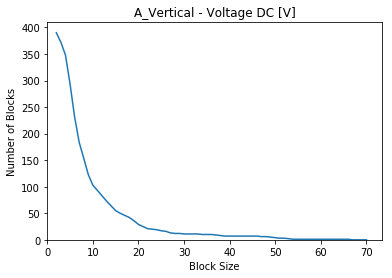

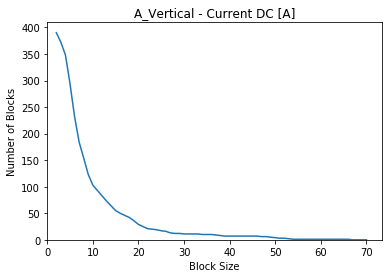

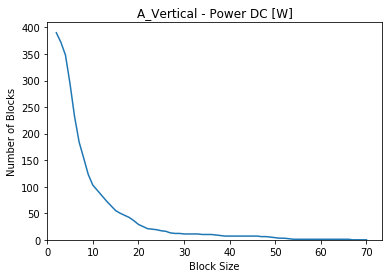

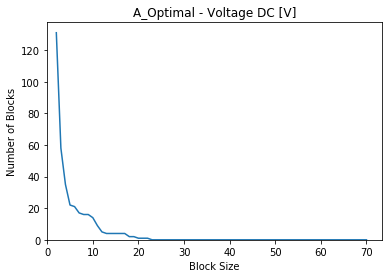

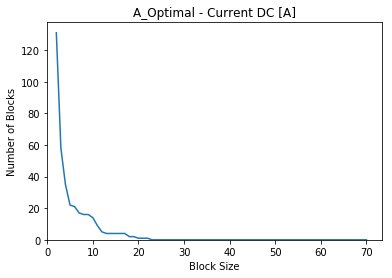

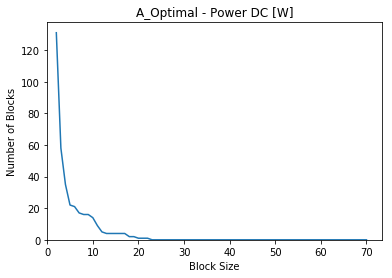

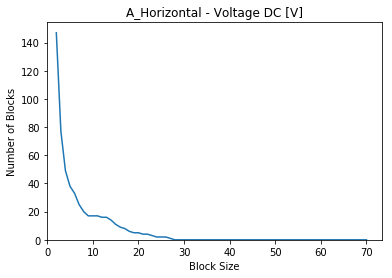

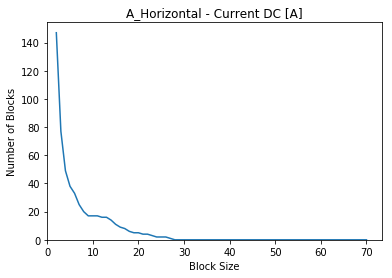

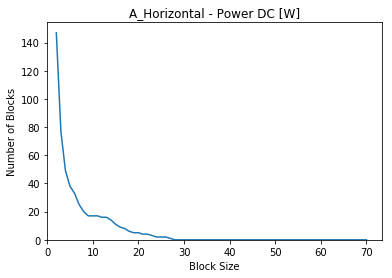

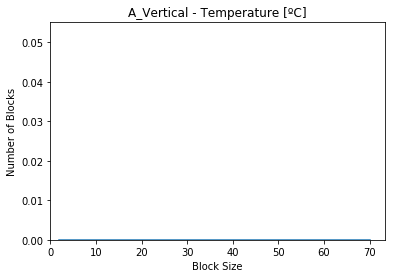

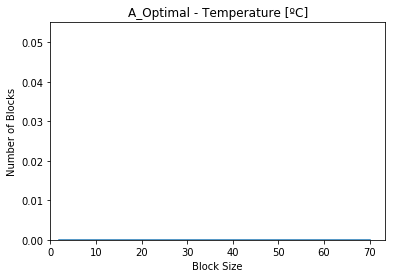

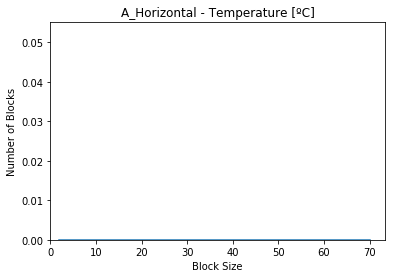

In [263]:
## Determining size of NaN blocks

def find_NaN_blocks(s, min_block_size):
    # Given a series and minimum block size, location of block start (plus block size) is returned
    a = s.isnull()
    return a.cumsum()-a.cumsum().where(~a).ffill().fillna(0) == min_block_size

def visualise_NaN_block_size(df, col):
    s = df[col]
    min_block_size_list = list(range(2, 71))
    num_blocks_list = []

    for min_block_size in min_block_size_list:
        num_blocks = find_NaN_blocks(s, min_block_size).sum()
        num_blocks_list.append(num_blocks)

    plt.figure()
    plt.plot(min_block_size_list, num_blocks_list)
    plt.title(col)
    plt.xlabel('Block Size')
    plt.ylabel('Number of Blocks')
    plt.xlim(0)
    plt.ylim(0)
    
for col in df_2014_gen.keys()[:-17]:
    visualise_NaN_block_size(df_2014_gen, col)

## As NaN blocks here are less than 30 minutes long they can be filled in with an average of before and after values.
## Will need to check the other columns as well

In [267]:
def impute_nan_avg_adjacent(df, drop_head_tail_na=False, fill_head_tail_na=False):
    # Replaces null values with an average of the values immediately before and after
    df_null_fill = df.where(df.notnull(), other=(df.fillna(method='ffill')+df.fillna(method='bfill'))/2)
    
    if drop_head_tail_na == True:
        df_null_fill = df_null_fill.dropna()
    else:
        if fill_head_tail_na == True:
            df_null_fill = df_null_fill.fillna(0)
        
    return df_null_fill

df_null_fill = impute_nan_avg_adjacent(df_2014_gen, fill_head_tail_na=True)
df_null_fill

,A_Vertical - Voltage DC [V],A_Vertical - Current DC [A],A_Vertical - Power DC [W],A_Optimal - Voltage DC [V],A_Optimal - Current DC [A],A_Optimal - Power DC [W],A_Horizontal - Voltage DC [V],A_Horizontal - Current DC [A],A_Horizontal - Power DC [W],A_Vertical - Temperature [ºC],...,B_Horizontal - Current DC [A],B_Horizontal - Power DC [W],B_Vertical - Temperature [ºC],B_Optimal - Temperature [ºC],B_Horizontal - Temperature [ºC],month,day,hour,minute,dec_time
Datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 07:41:00,0.00,0.0000,0.000000,14.60,0.19527,2.850946,0.00,0.0000,0.000000,9.0,...,0.0000,0.000000,10.2,9.7,8.8,1,1,7,41,7.683333
2014-01-01 07:42:00,0.00,0.0000,0.000000,23.10,0.07250,1.674750,0.00,0.0000,0.000000,9.0,...,0.0000,0.000000,10.2,9.7,8.8,1,1,7,42,7.700000
2014-01-01 07:43:00,19.00,0.0475,0.902500,23.10,0.07500,1.732500,0.00,0.0000,0.000000,9.0,...,0.0000,0.000000,10.2,9.7,8.8,1,1,7,43,7.716667
2014-01-01 07:44:00,18.65,0.0500,0.932500,23.10,0.07750,1.790250,0.00,0.0000,0.000000,9.0,...,0.0000,0.000000,10.3,9.7,8.8,1,1,7,44,7.733333
2014-01-01 07:45:00,18.65,0.0550,1.025750,22.20,0.08250,1.831500,0.00,0.0000,0.000000,9.1,...,0.0000,0.000000,10.3,9.7,8.9,1,1,7,45,7.750000
2014-01-01 07:46:00,14.80,0.0600,0.888000,23.00,0.08500,1.955000,0.00,0.0000,0.000000,9.1,...,0.0000,0.000000,10.3,9.8,8.9,1,1,7,46,7.766667
2014-01-01 07:47:00,30.40,0.0075,0.228000,23.00,0.08750,2.012500,0.00,0.0000,0.000000,9.1,...,0.0000,0.000000,10.3,9.8,8.9,1,1,7,47,7.783333
2014-01-01 07:48:00,30.50,0.0050,0.152500,23.10,0.09250,2.136750,0.00,0.0000,0.000000,9.2,...,0.0000,0.000000,10.4,9.8,8.8,1,1,7,48,7.800000
2014-01-01 07:49:00,19.05,0.0700,1.333500,23.10,0.09750,2.252250,15.60,0.0550,0.858000,9.2,...,0.0575,1.124125,10.4,9.8,8.8,1,1,7,49,7.816667


Text(0,0.5,'Cumulative missing elements')

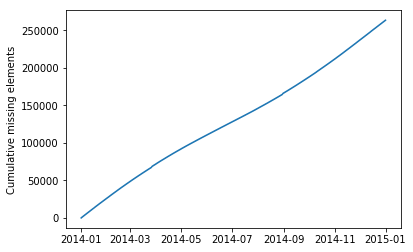

In [338]:
## Create missing datetimes array, plot time of day they occur
full_2014_dt_idx = pd.date_range(start='2014-01-01 00:00', end='2014-12-31 23:59', freq='min')
actual_2014_dt_idx = df_2014_gen.index

missing_dts_gen = np.setdiff1d(full_2014_dt_idx, actual_2014_dt_idx) # Returns elements in the first array which aren't in the second.

plt.figure()
plt.plot(missing_dts_gen, np.ones(len(missing_dts_gen)).cumsum())
plt.ylabel('Cumulative missing elements')

## Lack of step and ~linear nature indicates ~constant number of missing values

Text(0,0.5,'Number of Missing Values')

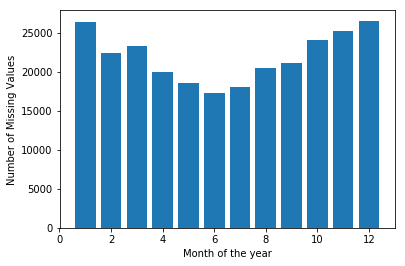

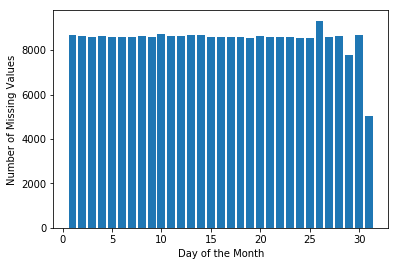

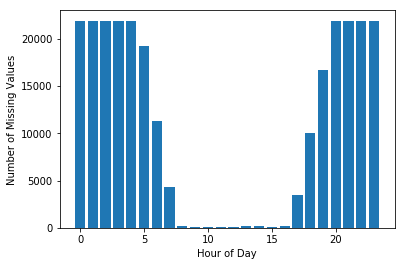

In [343]:
missing_day_counts = pd.value_counts(pd.to_datetime(missing_dts_gen).day).sort_index()
missing_hour_counts = pd.value_counts(pd.to_datetime(missing_dts_gen).hour).sort_index()
missing_month_counts = pd.value_counts(pd.to_datetime(missing_dts_gen).month).sort_index()

plt.figure()
plt.bar(missing_month_counts.index, missing_month_counts.values)
plt.xlabel('Month of the year')
plt.ylabel('Number of Missing Values')

plt.figure()
plt.bar(missing_day_counts.index, missing_day_counts.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Missing Values')

plt.figure()
plt.bar(missing_hour_counts.index, missing_hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Values')

## No discernible pattern by day of month but can see missing values due to lack of sunlight across months in year and over day.
## There continues to be missing values in the day as well though

#### 3.2 - Weather Dataset

Text(0,0.5,'Cumulative missing elements')

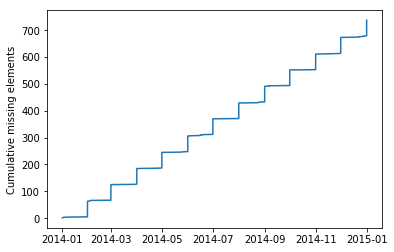

In [332]:
full_2014_dt_idx = pd.date_range(start='2014-01-01 00:00', end='2014-12-31 23:59', freq='min')
actual_2014_dt_idx = df_2014_weather.index

missing_dts_weather = np.setdiff1d(full_2014_dt_idx, actual_2014_dt_idx) # Returns elements in the first array which aren't in the second.

plt.figure()
plt.plot(missing_dts_weather, np.ones(len(missing_dts_weather)).cumsum())
plt.ylabel('Cumulative missing elements')

## Step frequency indicates missing values are on specific days of the month

Text(0,0.5,'Number of Missing Values')

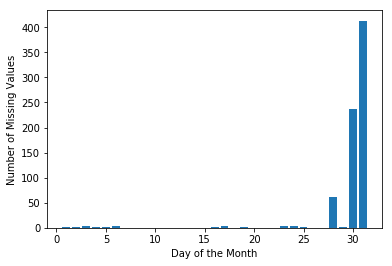

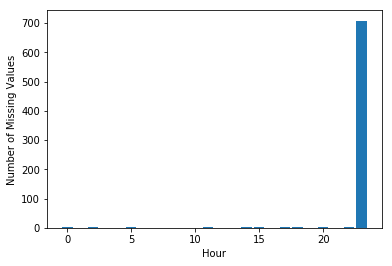

In [333]:
missing_day_counts = pd.value_counts(pd.to_datetime(missing_dts_weather).day).sort_index()
missing_hour_counts = pd.value_counts(pd.to_datetime(missing_dts_weather).hour).sort_index()

plt.figure()
plt.bar(missing_day_counts.index, missing_day_counts.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Missing Values')

plt.figure()
plt.bar(missing_hour_counts.index, missing_hour_counts.values)
plt.xlabel('Hour')
plt.ylabel('Number of Missing Values')

## Can see that the 30th and 31st have the most missing values, smaller bar on the 28th could be due to February.
## Essentially it appears as though most missed datetimes occur at the end of the day on the final day of the month

In [334]:
## Example of missing hour at end of month
start = actual_2014_dt_idx.searchsorted(datetime(2014, 2, 28))
end = actual_2014_dt_idx.searchsorted(datetime(2014, 3, 1))

actual_2014_dt_idx[start:end]

DatetimeIndex(['2014-02-28 00:00:00', '2014-02-28 00:01:00',
               '2014-02-28 00:02:00', '2014-02-28 00:03:00',
               '2014-02-28 00:04:00', '2014-02-28 00:05:00',
               '2014-02-28 00:06:00', '2014-02-28 00:07:00',
               '2014-02-28 00:08:00', '2014-02-28 00:09:00',
               ...
               '2014-02-28 22:51:00', '2014-02-28 22:52:00',
               '2014-02-28 22:53:00', '2014-02-28 22:54:00',
               '2014-02-28 22:55:00', '2014-02-28 22:56:00',
               '2014-02-28 22:57:00', '2014-02-28 22:58:00',
               '2014-02-28 22:59:00', '2014-02-28 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=1381, freq=None)

In [336]:
df_missing_dts = pd.DataFrame(data={'hour':pd.to_datetime(missing_dts_weather).hour, 
                                    'day':pd.to_datetime(missing_dts_weather).day}, 
                              index=missing_dts_weather)

df_missing_dts[~((df_missing_dts.hour==23)&(df_missing_dts.day.isin([28, 30, 31])))]

## Only 29 missing datetimes once the hour leading up to midnight is removed at the end of the month
## Can replace final hour with values from previous day, remaining missing datetimes can avg values from before and after
## Look into replacing final hour with first hour of next day, likely to be more similar than same hour day before.

,hour,day
2014-01-01 20:24:00,20,1
2014-01-02 16:54:00,16,2
2014-01-03 02:25:00,2,3
2014-01-06 22:52:00,22,6
2014-02-03 12:30:00,12,3
2014-02-03 17:48:00,17,3
2014-02-04 14:39:00,14,4
2014-03-29 20:32:00,20,29
2014-04-25 06:24:00,6,25
2014-05-24 00:22:00,0,24
